# 이미지 변환

### 동차좌표와 어파인 변환

- 동차좌표는 2차원 상의 점의 위치를 2차원 벡터가 아닌 3차원 벡터로 표현하는 방법

### 강체(크기가 변하지 않는 단단한 물체)변환
- 유클리드 변환이라고 하며 회전, 이동 두 가지 요소만 사용하여 이미지 변환한다

### 유사 변환(similarity transform)
- 확대/축소, 회전, 이동 세 가지 요소를 사용해 이미지 변환

- 변환행렬(사영행렬) 만들 때는 cv2.getRotationMatrix2D 함수 사용하는데 이때 사영행렬은 가장 마지막 행 [0, 0, 1]은 뺀 3*2행렬로 사용된다

### 3점 어파인 변환
- cv2.getAffineTransform

### 원근변환

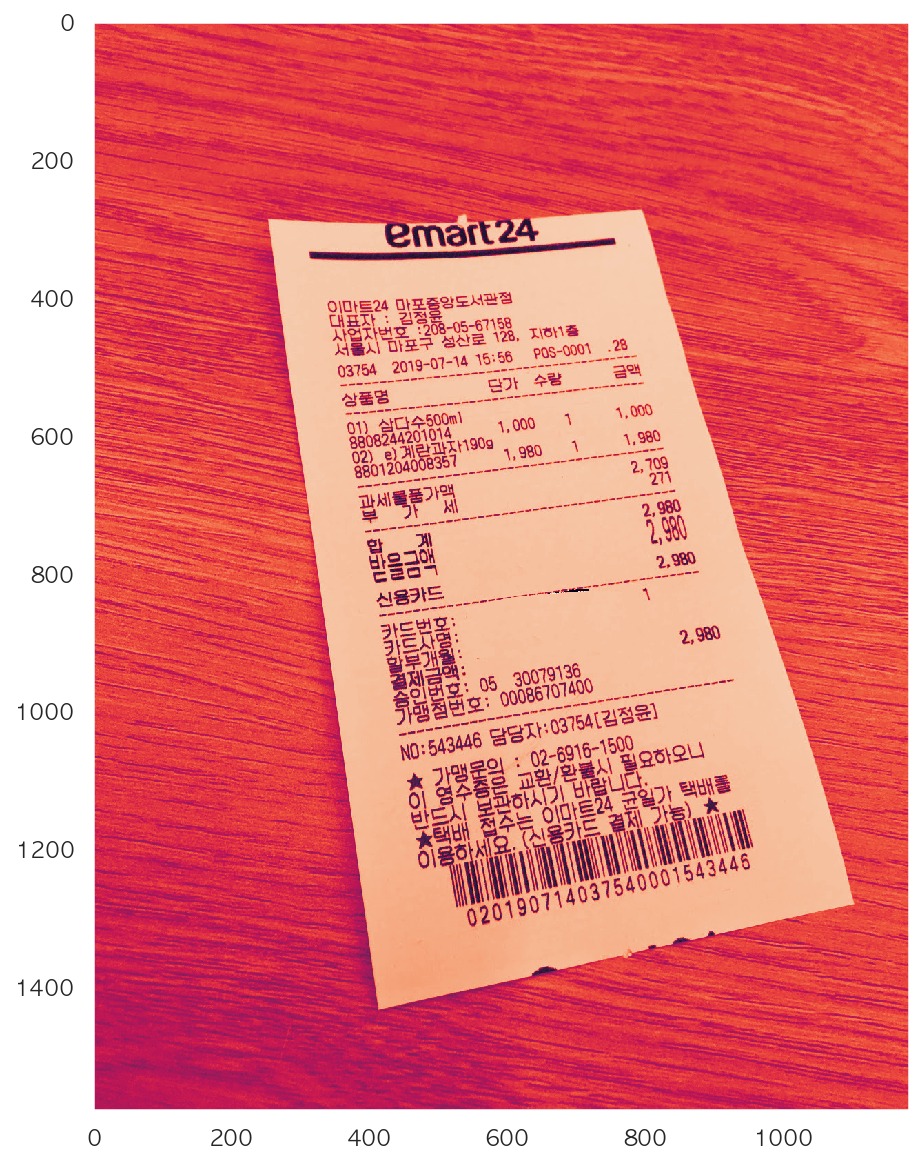

In [23]:
import cv2

img_receipt = cv2.imread("receipt.png")
img_receipt1 = img_receipt.copy()
img1 = cv2.cvtColor(img_receipt1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))
plt.grid(False)
plt.imshow(img1)

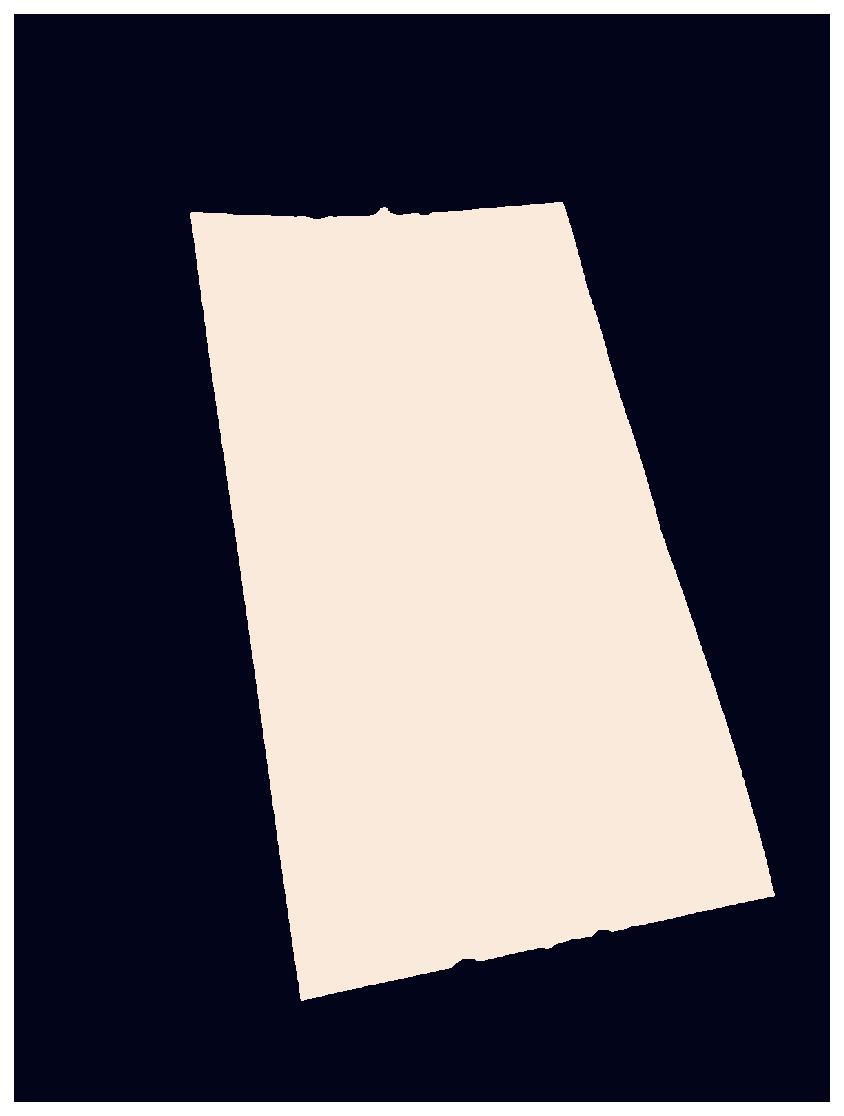

In [25]:
maxval = 255
thresh = maxval - 50

plt.figure(figsize =(10, 10))
plt.axis("off")
#img1 = cv2.bilateralFilter(img1, 30, 30, 30)

_, thresh1 = cv2.threshold(img1, thresh, maxval, cv2.THRESH_BINARY) # thresholding
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30)) # 클로징 
                          )
img_denoise = cv2.medianBlur(closing, 3) # 중간값 Blur

plt.imshow(img_denoise)

In [26]:
import cv2

img_raw = img_denoise
img = img_raw.copy()

contours, hierachy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)

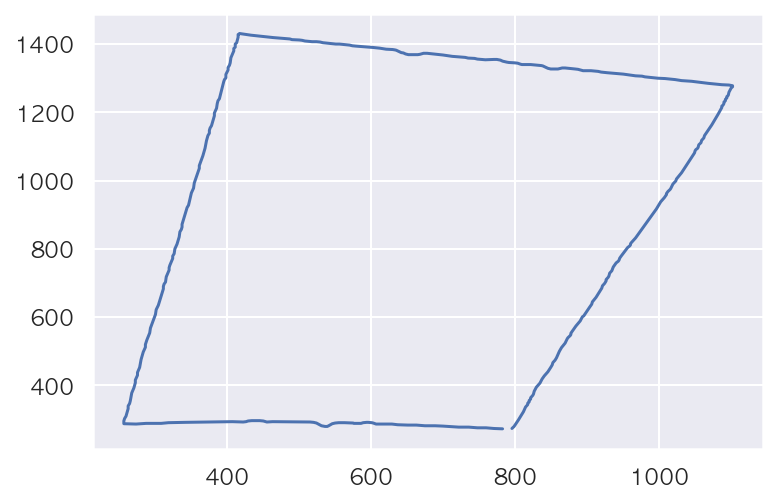

In [33]:
x0, y0 = zip(*np.squeeze(contours[0])) # squeeze 가장 바깥쪽의 리스트 문자 사라진다
# zip 사용해서 x,y 두개의 리스트로 나눠준다
plt.plot(x0, y0, c = "b")
plt.show()

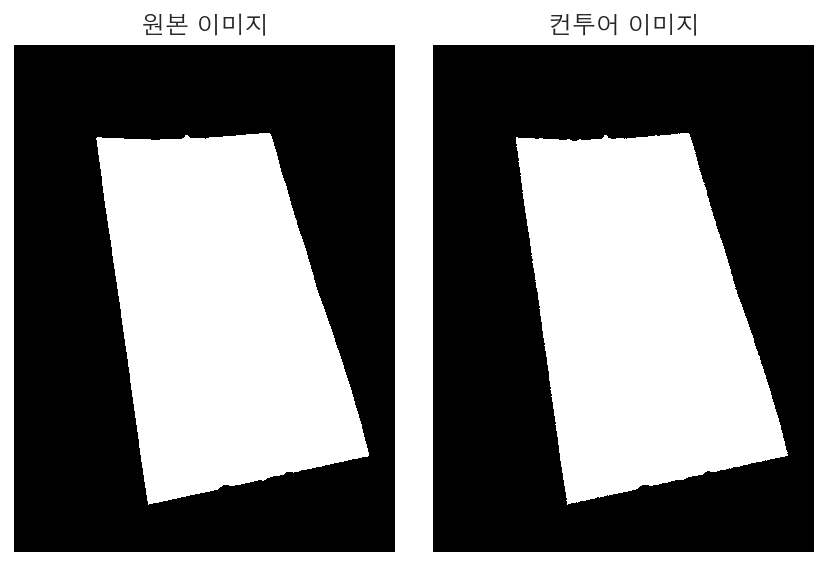

In [28]:
image = cv2.drawContours(img, contours, 0, 2)
plt.subplot(1, 2, 1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image, cmap='bone')
plt.title("컨투어 이미지")
plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
c0 = contours[0]

leftmost = tuple(c2[c2[:, :, 0].argmin()][0])
rightmost = tuple(c2[c2[:, :, 0].argmax()][0])
topmost = tuple(c2[c2[:, :, 1].argmin()][0])
bottommost = tuple(c2[c2[:, :, 1].argmax()][0])

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_receipt, cmap='bone')
plt.title("컨투어의 중심점")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_receipt, cmap='bone')
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]], 
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]], 
    c="r", s=30)
plt.title("Extream Points")

plt.show()

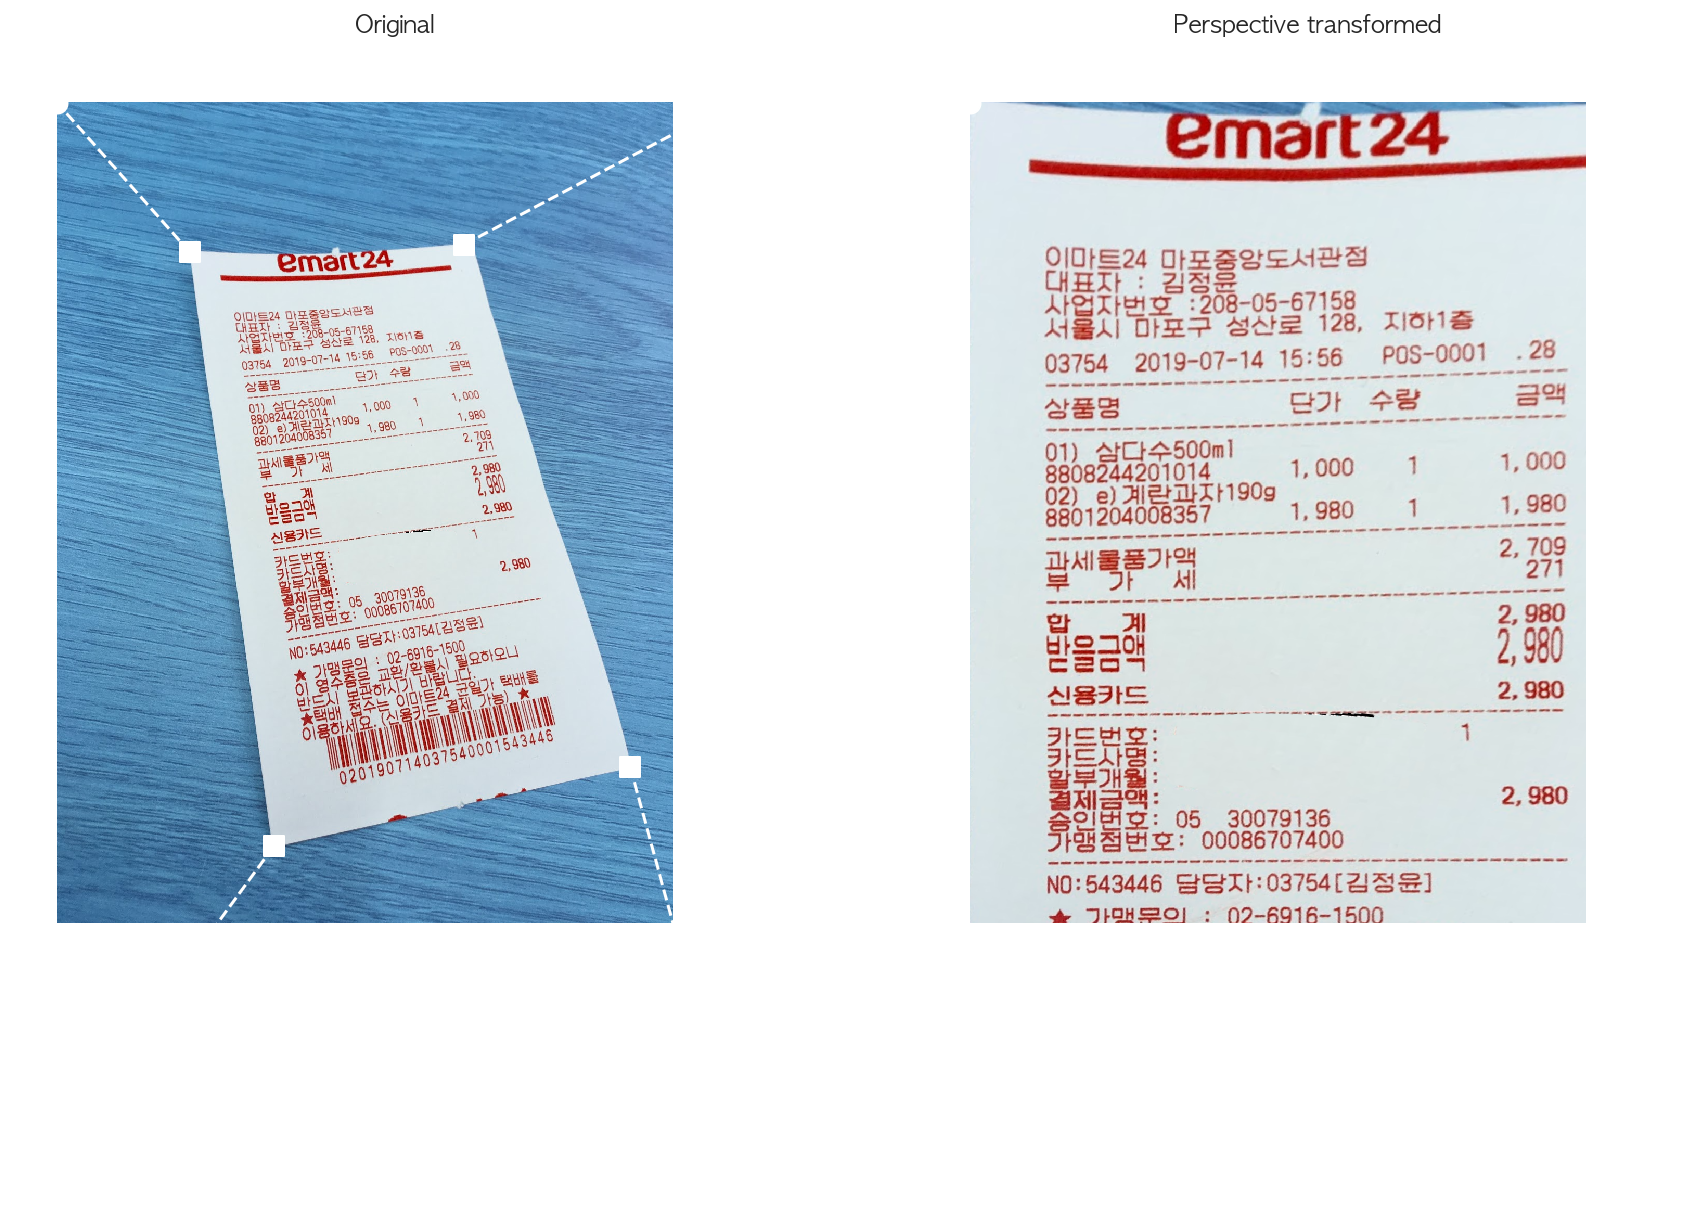

In [36]:
# 원근 변환
rows, cols = img.shape[:2]
leftmost = tuple(c0[c0[:, :, 0].argmin()][0])
rightmost = tuple(c0[c0[:, :, 0].argmax()][0])
topmost = tuple(c0[c0[:, :, 1].argmin()][0])
bottommost = tuple(c0[c0[:, :, 1].argmax()][0])


pts1 = np.float32([leftmost, bottommost, rightmost, topmost]) # 원본 컨투어 위치
pts2 = np.float32([[0, 0], [0, 2000], [1300, 2000], [1300, 0]]) # 변환 위치

# pts2 = np.float32([[0, 0], [1184, 1578], [1184, 0], [0, 1578]])
# pts_x, pts_y = zip(*pts1)
# pts_x_, pts_y_ = zip(*pts2)


H_perspective = cv2.getPerspectiveTransform(pts1, pts2)

img2 = cv2.warpPerspective(img_receipt, H_perspective, (cols, rows))

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 15))

pts_x, pts_y = zip(*pts1)
pts_x_, pts_y_ = zip(*pts2)

ax1.set_title("Original")
ax1.imshow(img_receipt, cmap=plt.cm.bone)
ax1.scatter(pts_x, pts_y, c='w', s=100, marker="s")
ax1.scatter(pts_x_, pts_y_, c='w', s=100)
ax1.plot(list(zip(*np.stack((pts_x, pts_x_), axis=-1))),
         list(zip(*np.stack((pts_y, pts_y_), axis=-1))), "--", c="w")
ax1.axis("off")


ax2.set_title("Perspective transformed")
ax2.imshow(img2, cmap=plt.cm.bone)
ax2.scatter(pts_x_, pts_y_, c='w', s=100)
ax2.axis("off")
plt.show()


#### 완성된 이미지 OCR 하고 싶으면 구글 tesseract-ocr 사용하면 된다
- 한글 성능이 좋지 않음

# 이미지 특징 추출
- Bag of Visual words
- 라인, 코너, 특징점 등과같은 특징 추출

### 이미지 미분
- 흑백이미지로 보게 되면 이미지는 명암이 높아졌다 낮아졌다 하는 것. 등고선
- 등고선의 그레디언트 벡터 구하는 작업
- 그레디언트 벡터의 크기가 인텐서티(intensity), 인텐서티를 구하는 연산을 라플라스 연산이라고 한다ㅡ

### 엣지 추출
- 경계선 추출
- 캐니 엣지 추출: 조금 더 성능 좋은

### 코너 추출
- 엣지 교차 지점

### 이미지 히스토그램
- 데이터 집합에서 특정 구간의 값을 가지는 데이터의 개수를 세어 나타낸 것이 히스토그램
- 이미지 히스토그램은 이미지에서 특정 밝기(명도) 구간에 들어가는 픽셀의 수를 나타낸 것

### 그레디언트 히스토그램 설명자
-특징점 주변의 픽셀을 패치로 오려낸다.

In [78]:
# SIFT, SURF 알고리즘은 라이센스 문제가 있다. 오픈소스인 것은 맞는데 함부로 빌드해서 다른 사람한테 다운받게 해줄 수 없다.
# 3점대 버전은 되고 4점대 버전은 안 될 것

- 특징점 매치는 파노라마 이미지에 사용된다
- 구글 이미지 서치도 바로 이 특징점 데이터베이스 만들어서 특징점 비슷한 애들 찾아주는 것
- 일반 디비에 이미지를 저장하는 게 아니라 이미지 특징점 저장해서 제일 유사한 특징점 많은 애들을 찾아주는 것
- 얼굴인식과는 관련 없다
    - 역시 얼굴인식과는 관련 없지만 템플릿 매칭이라는 것이 있다. 머신러닝을 이용한 물체 인식 . 오픈CV에 기능 포함돼 있다

- 딥러닝에서 이미지 같은 경우 제일 많이 쓰이는 모델은 제너레이션 모델이다. 이미지를 만들어내고 변형하는
- 지금까지 나온 이미지 처리방법은 머신러닝 딥러닝 아니고 고전적인 이미지 처리 방법이다

# 사운드 프로세싱 기초

- 소리는 공기를 구성하는 입자들이 진동하는 현상.
- 공기의 진동을 측정하는 양적 기준을 음압(sound pressure)라고 한다.
- 사운드 데이터란 이 음압의 변화를 기록한 시계열 데이터이다

### 사인 함수
- 음압의 변화를 나타내는 시계열 데이터 중 가장 단순한 형태가 사인함수
- 다음과 같은 3가지 특징을 가진다
    - 진폭(A)
    - 주파수(w, f): 진동 속도, 초당 진동의 횟수, 주파수가 높으면 빠르게 진동, 주파수의 역수를 주기(한 번 진동에 필요한 시간)
    - 위상: 함수의 시작점

### 싱글 톤
- 주파수는 사람에게 음의 높이(톤)로 인식된다
- 하나의 사인파로 이루어진 소리를 싱글 톤이라고 한다

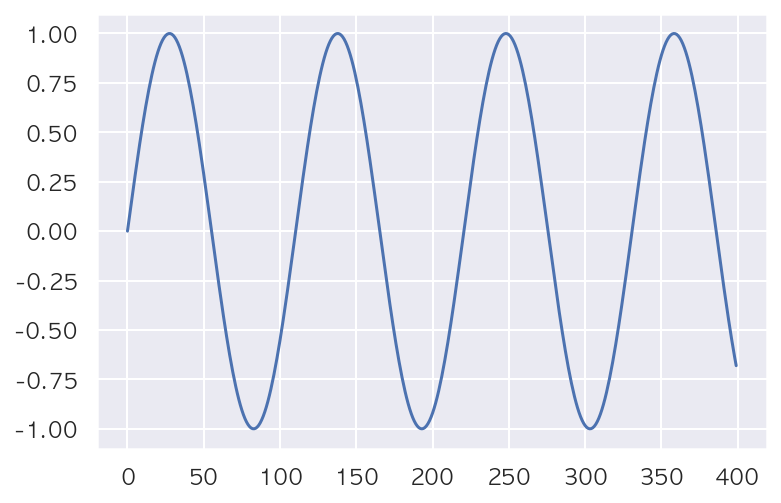

In [81]:
# 1초에 44100번의 디지털 신호를 내는 싱글톤을 하나 만드는 것
def single_tone(frequecy, sampling_rate=44100, duration=1):
    # frequency: 주파수
    # sampling_rate: 초당 샘플링 데이터 수. 디폴트 44100
    # duration: 지속 시간. 단위 초. 디폴트 1초
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

y = single_tone(400)

plt.plot(y[:400])
plt.show()

# Dual-tone-multi-frequency signaling(DTMF)
- 전화는 DTMF 방식이라는 두 싱글톤 조합의 음향 신호로 전화번호를 입력받는다
    - 집전화, 공중전화
    - 소리의 높낮이를 듣고 걸리는 것

- 휴대폰 앱에도 DTMF 소리를 내거나 해독하는 앱이 있을 것

# 푸리에 변환과 스펙트럼
- 음성(speech), 음악(music) 등의 음향(sound) 데이터에서 특징(feature)을 추출하는 방법인 푸리에 변환과 스펙트럼에 대해서 알아본다
- 원래 범위가 넓은 분야, 한 학기에 배우는 양. 여기선 이런 게 있다 정도로

- 목소리 음악도 아주 많은 하모니가 섞여 들어가 있는 것이라고 보면 됨
- 모음은 싱글톤에 가깝지만 자음은 하모니가 섞여 들어간다.

### 정현파 조합
- 모든 신호는 주파수(frequency)와 크기(magnitude), 위상(phase)이 다른 정현파(sinusolida signal)의 조합으로 나타낼 수 있다
- 푸리에 변환은 조합된 정현파의 합(하모니) 신호에서 그 신호를 구성하는 정현파들을 각각 분리해내는 방법이다

### 푸리에 변환
- 주기 T를 가지고 반복되는 모든 함수 y는 주파수와 진폭이 다른 몇개의 사인 함수(정확히는 복수 지수함수)의 합으로 나타낼 수 있다
- 이 사인 함수의 진폭을 구하는 과정을 푸리에 변환이라고 한다
- 주파수를 푸리에 변환식에 넣어서 주파수 성분이 있는지 없는지를 알 수 있게 된다

### 이산 푸리에 변환(Discrete ~, DFT)
- 길이가 N으로 정해져 있는 경우
- 푸리에 변환과 달리 식이 적분이 아니라 sum 형태로 나타나게 돼 컴퓨터로 계산할 수 있게 된다

### 고속 푸리에 변환(Fast~, FFT)
- 이산 푸리에 변환을 빠르게 할 수 있는 알고리즘의 이름이다
- 실제로는 계속 반복되는 시계열에 대해 푸리에 변환을 하는 것
- 시계열의 시작 부분과 끝 부분이 너무 다르면 원래 시계열에는 없는 신호가 나올 수도 있는데 이를 깁스 현상(Gibbs phenomenon)이라고 한다

### DCT(Discrete Cosine Transform)
- 푸리에 변환의 간단한 버전
- DFT와 유사하지만 기저함수로 복소 지수함수가 아닌 코사인함수를 사용한다
- DFT보다 계산이 간단하고 실수만 출력한다는 장점이 있어 DFT 대용으로 많이 사용된다
- 비슷한 속성이 나오지 똑같지는 않음

### 스펙트럼
- 보통 스펙트럼이라고 부르는 시계열 분석의 정확한 명칭은 파워 스펙트럼 또는 스펙트럼 밀도다
- 신호를 구간을 끊어서 분석하는데 신호가 똑같은 특성이 무한히 반복된다고 가정할 수 있다면 파워 스펙트럼을 구할 수 있다
- 푸리에 변환은 결정론적인 시계열 데이터를 주파수 영역으로 변환하는 것을 말하지만 스펙트럼은 확률론적인 확률과정 모형을 주파수 영역으로 변환하는 것을 말한다
- 따라서 푸리에 변환과 달리 시계열의 위상 정보는 스펙트럼에 나타나지 않는다

- 똑같은 주파수의 사인파가 더해지면 진폭만 커진다

### STFT(Short-Time Fourier Transform)
- 주파수 특성이 시간에 따라 달라지는 사운드를 분석하기 위한 방법
- 시계열을 일정한 시간 구간으로 나누고 각 구간에 대해 스펙트럼을 구한 데이터이다.
- 시간, 주파수의 2차원 데이터로 나타난다

# librosa 패키지¶
- 파이썬으로 STFT 스펙트럼 분석을 하려면 librosa 패키지를 사용한다.
- 주피터 노트북에서 librosa 패키지를 사용할 때는 jupyter_notebook_config.py파일의 iopub_data_rate_limit 설정을 10000000 정도로 크게 해야 한다.

### 멜 스펙트럼
- 멜 스펙트럼은 주파수 단위를 로그 공식을 활용해 멜 당위로 바꾼 스펙트럼을 말한다
- 낮은 주파수에서는 구분하기 위한 레졸루션 사이즈를 크게 하고 높은 주파수에서는 크게 하고

### MFCC¶
- MFCC(Mel-frequency cepstral coefficients)는 Mel Scale Spectrum을 40개의 주파수 구역(band)으로 묶은뒤에 이를 다시 푸리에 변환하여 얻은 계수이다. 스펙트럼이 어떤 모양으로 되어 있는지를 나타내는 특성값이라고 생각할 수 있다.

#### 최종적으로 음성은 스펙트럼을 구한 뒤 MFCC라고 하는 벡터의 열로서 변환시켜서 피처를 뽑아낸다. 통신에서 이러한 방법 많이 쓴다

# 지리 정보 데이터 처리

- 이론적인 부분은 별로 없고 이런 패키지 쓰면 된다라는 한 예로
- 지리정보데이터, GIS(Geospatial Information System) 라고 말하는 것은 위치에 대한 정보를 광범위하게 포함하는 말이다. 예로는 좌표, 주소, 도시 , 우편번호 등이 있다. 이 절에서는 지리정보를 처리하는데 유용한 패키지와 지리 정보 데이터를 처리하는 방법에 대해 설명할 것이다.

### GeoPandas
- 파이선에서 지리정보 데이터 처리의 기하학적 연산과 시각화 등을 돕는 패키지다.

- 폴리곤, 포인트, 라인,
- korea 안 먹으면 south korea로

#### 지리 정보 조작¶
     - 이번에는 한국의 기초구역도 데이터를 활용하여 지리정보를 조작하는 예제를 만들었다.
     - 데이터는 아래의 링크에서 다운로드 할 수 있다.
        - http://www.juso.go.kr/addrlink/addressBuildDevNew.do?menu=bsin

- 컨벡스 헐(convex_hull) 데이터 중 일부가 안쪽으로 오목히 들어간 데가 있으면 채워주는

### 지오판다스의 좌표계(Coordinate reference systems)
- 좌표계(CRS)는 지구라는 곡면을 2차원 데이터 (평면)로 표현하는 방법론 의미

- GeoPandas 데이터라면, crs 속성값으로 확인 할 수 있다. 좌표계가 다른 데이터의 경우, 좌표간의 거리나 위치 등이 다르게 표현되기 때문에 반드시 통일 시켜주어야 한다. 잘 사용되는 좌표계는 다음과 같다.

- WGS84(EPSG:4326): GPS가 사용하는 좌표계(경도와 위도)
- Bessel 1841(EPSG:4004): 한국과 일본에 잘 맞는 지역타원체를 사용한 좌표계
- GRS80 UTM-K(EPSG:5179): 한반도 전체를 하나의 좌표계로 나타낼 때 많이 사용하는 좌표계. 네이버 지도
- GRS80 중부원점(EPSG:5181): 과거 지리원 좌표계에서 타원체 문제를 수정한 좌표계. 다음카카오 지도
- Web mercator projection(Pseudo-Mercator, EPSG:3857) : 구글지도/빙지도/야후지도/OSM 등 에서 사용중인 좌표계
- Albers projection(EPSG:9822) : 미국 지질 조사국에서 사용하는 좌표계

- 나라마다, 서비스마다 사용하는 좌표계 방식의 이름이 다르기 때문에 이를 통일해주고 국제적인 번호로 만든 게 EPSG

### Geocoding
- 지오판다스가 제공
- 주소를 좌표로 바꾸거나 좌표를 주소로 바꾸는 기능을 한다. 이 책에서는 지오코팅을 위해서 구글의 map API를 사용한다
- 이 때 API를 사용하기 위해서 접근 키가 필요한데 이는 실습을 원한다면 본인이 직접 만들어야 한다.

- 지오메트리 정보는 크게 사용할 일이 많지 않다

# 2부 지도학습

## 5. 분류모형 입문
### 5.1 분류형 예제 데이터

- 이진 분류 문제를 계속해서 구분하는 방식을 계속 쓸거다

In [98]:
# 연습 문제 1¶
# 꽃잎 길이의 기준값(thresh)이 얼마이면 세토사와 다른 종을 완벽하게 구분할 수 있는가?

In [145]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR) # Dataset Characteristics

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [146]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = "category")
sy = sy.cat.rename_categories(iris.target_names)
df["species"] = sy
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

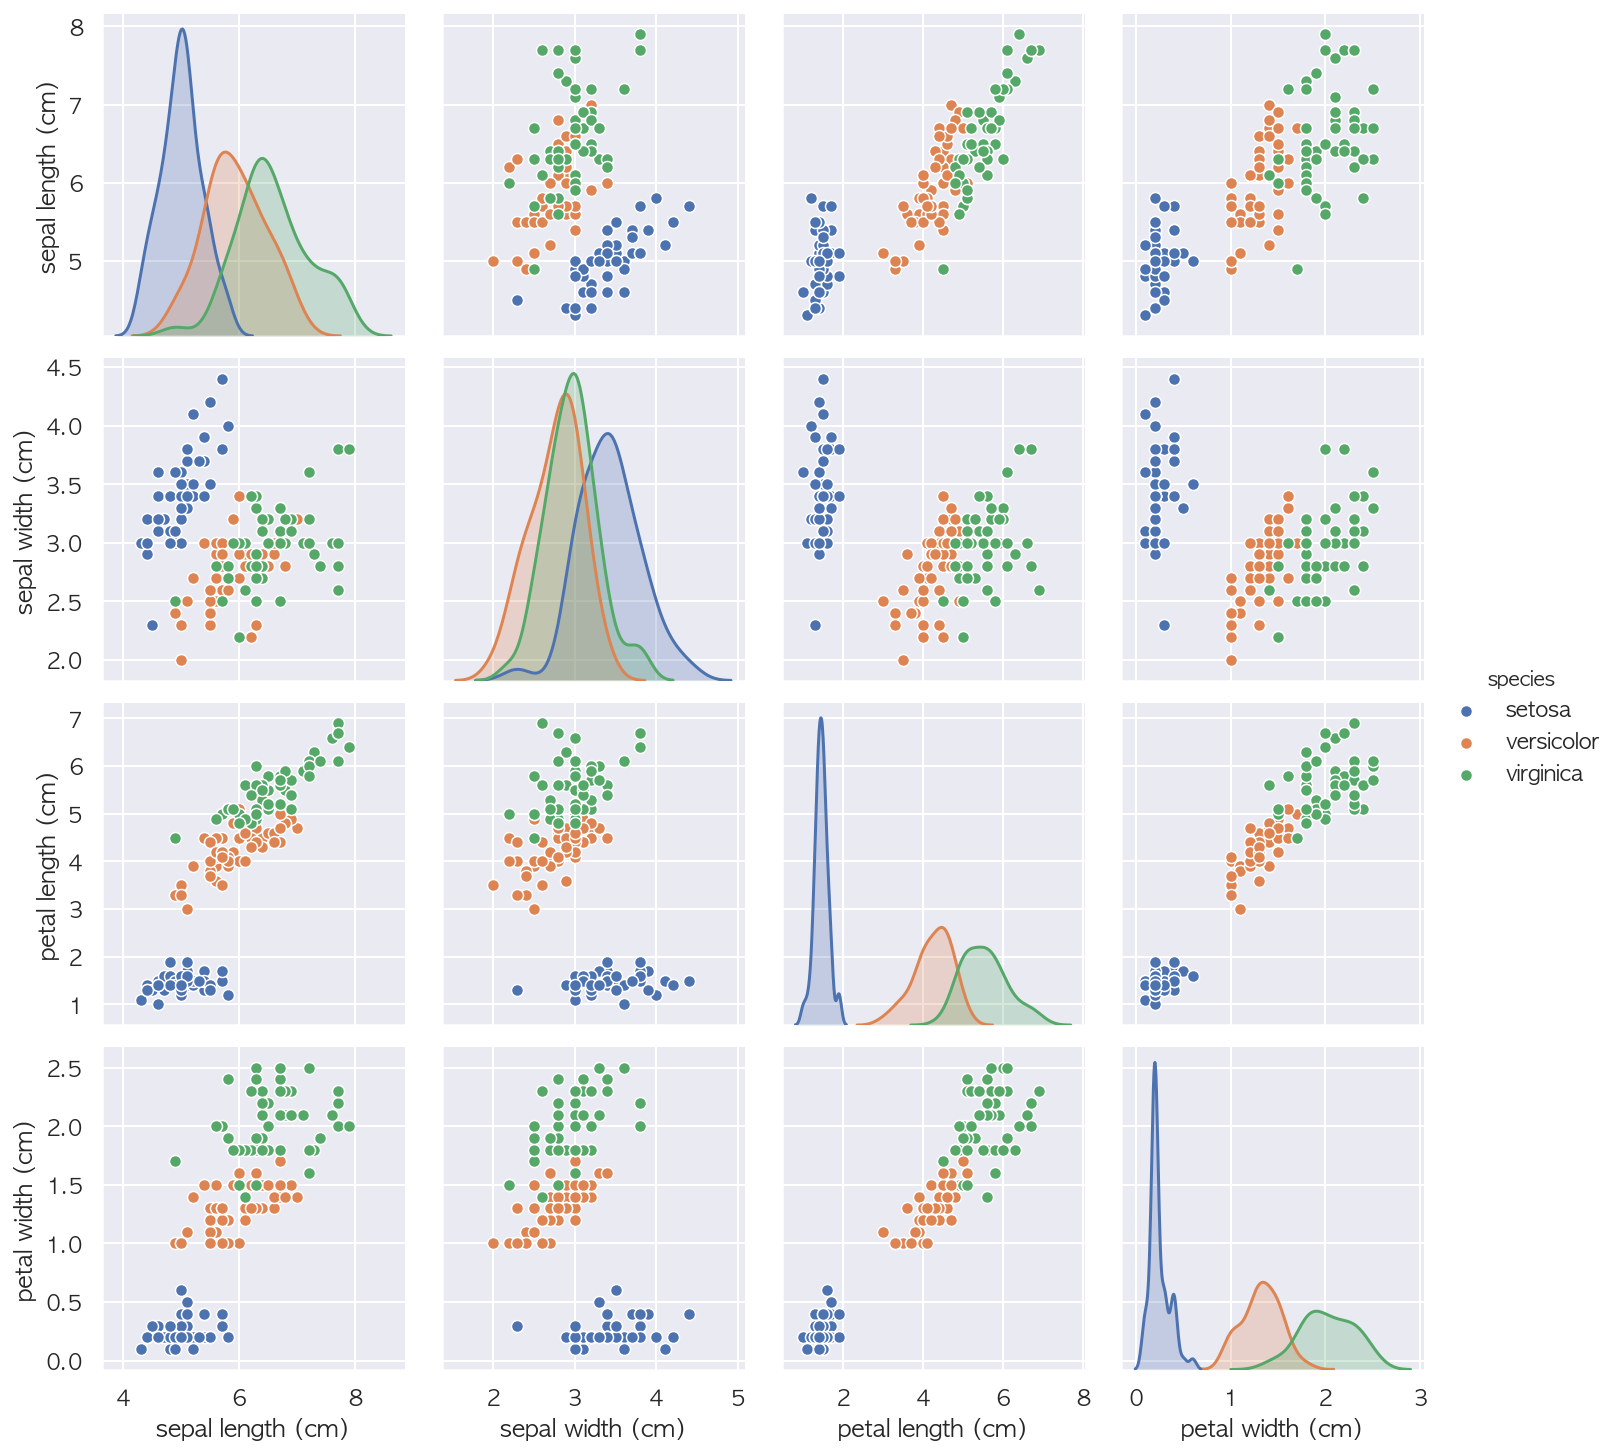

In [147]:
import seaborn as sns

sns.pairplot(df, hue = "species")
plt.show()

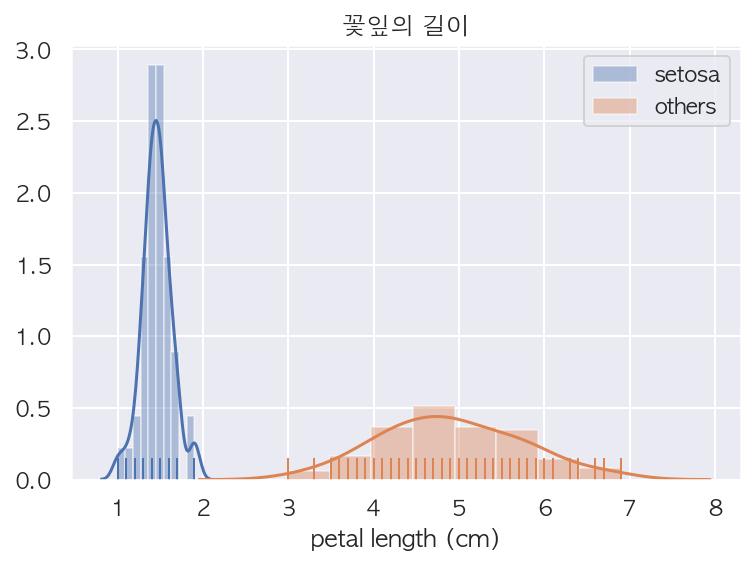

In [148]:
setosa = df["petal length (cm)"][df["species"] == "setosa"]
others = df["petal length (cm)"][df["species"] != "setosa"]

sns.distplot(setosa, hist = True, rug = True, label = "setosa")
sns.distplot(others, hist = True, rug = True, label = "others")
plt.title("꽃잎의 길이")
plt.legend()
plt.show()

In [158]:
threshold = 4
df["species2"] = df["species"] == "setosa"
df["predict"] = df["petal length (cm)"] <= threshold
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  species2  predict  
0       setosa      True     True  
1       setosa      True     True  
2       setosa      True     True  
3       setosa      True     True  
4       setosa      True     True  
..         ...       ...      ...  
145  virginica     False    False  
146  virginica     False    False  
147  virginica     False    False  
148  virginica     False    False  
149  virginica     False    False  

[150 rows x 7 columns]

In [164]:
df["species2"] = df["species"] == "setosa"
thresholds = np.linspace(1, 3, 20)
list_accuracy = []

for t in thresholds:
    df["predict"] = df["petal length (cm)"] <= t
    accuracy = (df["species2"] == df["predict"]).sum()
    list_accuracy.append(accuracy)
list(zip(thresholds, list_accuracy))

[(1.0, 101),
 (1.1052631578947367, 102),
 (1.2105263157894737, 104),
 (1.3157894736842106, 111),
 (1.4210526315789473, 124),
 (1.526315789473684, 137),
 (1.631578947368421, 144),
 (1.736842105263158, 148),
 (1.8421052631578947, 148),
 (1.9473684210526314, 150),
 (2.052631578947368, 150),
 (2.1578947368421053, 150),
 (2.263157894736842, 150),
 (2.3684210526315788, 150),
 (2.473684210526316, 150),
 (2.5789473684210527, 150),
 (2.6842105263157894, 150),
 (2.789473684210526, 150),
 (2.894736842105263, 150),
 (3.0, 149)]

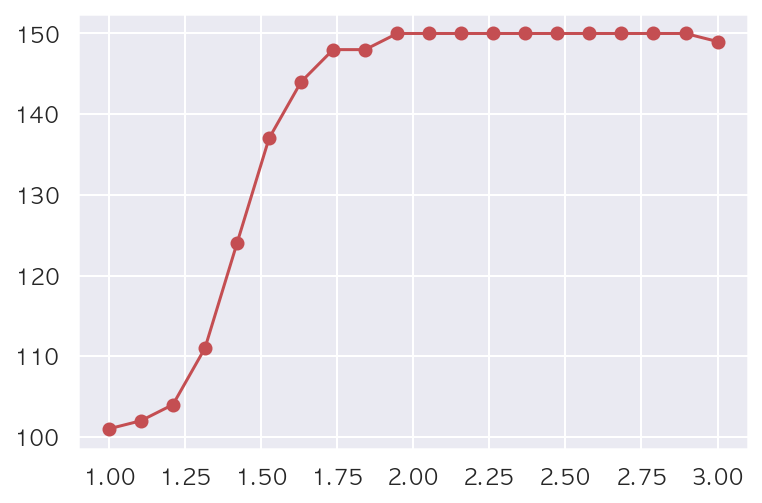

In [165]:
plt.plot(thresholds, list_accuracy, "ro-")

## 5.2 분류용 가상 데이터 생성 

- 독립변수 중 다른 독립변수의 선형 조합으로 나타나는 변수가 있게 되면 다중공선성이 생긴다
- 아주 심할 경우에는 풀랭크가 아니여서 역행렬이 존재하지 않아 문제를 풀 수 없게 되는 경우가 생긴다
- 다만 분류 문제 같은 경우에는 이런 다중공선성이 문제가 될 수도 있고 안 될수도 있다.
- 그런데 대부분의 경우에는 문제가 안 된다. 회귀분석에서는 문제가 된다